## Activity determination for *Rh*MOP against different oligo-mannosacharides

    Carried out on may 2022, by Simon Birgersson


*Lund university, Center for Molecular Protein Science (CMPS), Henrik Stålbrand Group.*

*** 
**Purpose:**  

To determine acitivty for the *Rosburia hominis* mannophosporylase (*Rh*MOP) against different oligo-mannosacharides (MO:s).  
The idea is to see whether or not the enzyme prefers longer or shorter substrates, to fit into the discussion being prepared in the *R. hominis* cluster paper being constructed in the group currently. The assay works in the *synthetic* reaction, shown below:

$M_{x-1} + M_11PO_4 \longleftrightarrow M_{x} + PO_4$

Here the amount of release phosphate is stochiometrically equivalent to the amount of reaction events, and can thus be tracked to follow the reaction using the phosphate assay. The incubation were set up as described below:

# Incubation  protocol
* **Enzyme:** *Rh*MOP, stock from MW, 0.14 mg/ml in reaction
* **Substrate:** M2, M3, M4, M5 10mM in reaction
* **Phosphate source:** 10mM Mannose-1-phosphate (M1P) in reaction
* **Buffer:** 50mM Sodium Citrate pH 5.5
* **Time:** [0, 10] min sample points
* **Temperature:** T = 37°C
* **Absorbance** measured at  $\lambda$ = 620 nm
* Experiments carried out in 96 well sample plate

|             | Man  | M1P| RHMOP (8.1 mg/ml) | buffer (400mM stock)| H2O    | # repl. | 
|-------------|-----|-----|-------|---------------------|--------|---------|
| Sample      | 6 μl| 6 μl| 1 μl  | 7.5 μl              |39.5  μl|3        |
| Sample      | 6 μl| 6 μl| 1 μl  | 7.5 μl              |39.5  μl|3        |         
| Man ctrl     | 6 μl| /   | /     | 7.5 μl              |46.5  μl|2        |
| M1P ctrl    | /   | 6 μl| /     | 7.5 μl              |46.5  μl|2        |
| enz ctrl    | /   | /   | 1 μl  | 7.5 μl              |51.5  μl|2        |
| buffer ctrl | /   | /   | /     | 7.5 μl              |52.5  μl|2        |


## Assay Protocol

1. Dilution of phosphate standard series. prepare 1 ml of 40 μM *Phosphate Premix solution* by mixing 40 μl of 1 mM phosphate standard solution with 960 μl of ultrapure H2O. Number each standard tube. Prepare 8 standard solution by mixing the *premix solution* and H2O according to the table below:

| # | Premix + H2O   | Final vol. [μl] | Phosphate conc [μM] | pmoles phosphate in 50 μl |
|---|----------------|-----------------|---------------------|---------------------------|
| 1 | 200 μl + 0 μl  | 200             | 40                  | 2.000                     |
| 2 | 160 μl + 40 μl | 200             | 32                  | 1.600                     |
| 3 | 120 μl + 80 μl | 200             | 24                  | 1.200                     |
| 4 | 80 μl + 120 μl | 200             | 16                  | 800                       |
| 5 | 60 μl + 140 μl | 200             | 12                  | 600                       |
| 6 | 40 μl + 160 μl | 200             | 8                   | 400                       |
| 7 | 20 μl + 180 μl | 200             | 4                   | 200                       |
| 8 | 0 μl + 200 μl  | 200             | 0                   | 0                         |

2. Transfer 50 μl of test sample (e.g, enzyme reaction) in duplicate into wells of the microplate. In the case of enzyme reactions, the reactions may be terminated by either adding a specific inhibitor or can be stopped directly by the addition of the *Malachite Green Reagent*. Reaction buffer can be added as a blank control for the samples.

3. Add 100 μl of the *Malachite Green Reagent* to each well. Mix by tapping the plate.

4. Incubate for 30 min at Room Temperature (RT)  for color development.

5. Measure absorbance at $\lambda$ = 600-660 nm on plate reader.

In [1]:
# initalization 
from utils.activity_assay import Standard, Enzyme, generate_excel_report # classes for storing data
import matplotlib.pyplot as plt # module for plotting data
import numpy as np # module for matrix operations
import pandas as pd
from datetime import datetime,date

# dilution factors of protein stock
sample_dil = np.array([60*125]) # dilution factor, 7500

# stock enzyme concentration
RhMOP_stock_conc = 8.1 # [mg/ml]

# std series concentrations of PO4
std_c   = np.array([4,6,12,16,24,32,40])# [uM]

# incubation time in min
incubation_time = 10 # [min]

# unit of known concentratrions in std curve
x_unit = "μM"
# unit of measured value
y_unit = "AU"

**Standard data**

Here is where is input the standard data and handle raw data input, blanks, eventual points to remove, etc.

The class initilaztion will create std_name.fit, a regr object fitting the data to the equation:

$abs = c * slope + intercept$ 

and provide *slope* and *intercept* as callable variables, i.e "*std_name.fit.slope*"

**Sample data**

Here I input the raw data for my sample, same here all the raw data processing is done here before analysis. The standard equation in std.fit is inputted to get fitted concentrations for the sample.

Activity is calculated according to the following equations:

$ \frac{c(PO_4) [μM] }{ 10^6 [M/μM]} = c(PO_4) [M] \rightarrow  c(PO_4) [M] * 10^9 [nM/M] \rightarrow  c(PO_4) [nM] * 10^3 [l/ml] \rightarrow  c(PO_4) [nmol/ml] * 600 [1/s] = [nmol/ml/s] \rightarrow [nkat/ml]$

$ \frac{activity [nkat/ml]}{c(protein)[mg/ml]} \rightarrow [nkat/mg] $

# Mannobiose (M2) 22-05-30

In [2]:
"""Standard data for RhMOP+M2"""
# raw data for std curve, absorbance values minus mean of blanks [AU]
std_M2_abs = np.array([[0.265,0.352,0.408,0.473,0.626,0.728,0.813], [0.276,0.270,0.421,0.495,0.635,0.734,0.876]])-np.array([0.224,0.226]).mean()

# initialize standard object with measured absorbances.          
std_M2 = Standard(
        absorbance=std_M2_abs,
        concentration=std_c,
        x_unit=x_unit,
        y_unit=y_unit,
    )

"""Sample data for RhMOP+M2"""
# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
#RhMOP_M2_abs_0min  = np.array([[0.275],[0.244],[0.238]])-np.array([0.223,0.223]).mean() # [AU]
#RhMOP_M2_abs_10min = np.array([[0.969],[1.260],[1.186]])-np.array([0.238,0.227]).mean() # [AU]
RhMOP_M2_abs_0min  = np.array([[0.244],[0.238]])-np.array([0.223,0.223]).mean() # [AU]
RhMOP_M2_abs_10min = np.array([[1.260],[1.186]])-np.array([0.238,0.227]).mean() # [AU]

#initialize Enzyme objects
RhMOP_M2 = Enzyme(absorbance = RhMOP_M2_abs_10min - RhMOP_M2_abs_0min,
                Name= "RhMOP+M2",
                regr=std_M2.fit,
                time=incubation_time,
                dilution_factor=sample_dil,
                enzyme_stock_conc= RhMOP_stock_conc,
                x_unit = x_unit,
            )

print(std_M2) # show data in "table"
print(RhMOP_M2.df.T) # show data in "table"

1
Standard Data: 
    μM  abs #1  abs #2  mean [AU]  +/- [AU]
0   4   0.040   0.051     0.0455    0.0055
1   6   0.127   0.045     0.0860    0.0410
2  12   0.183   0.196     0.1895    0.0065
3  16   0.248   0.270     0.2590    0.0110
4  24   0.401   0.410     0.4055    0.0045
5  32   0.503   0.509     0.5060    0.0030
6  40   0.588   0.651     0.6195    0.0315  

Resulting std equation is:

    abs = c * 0.02 + -0.01

With an R^2 of 0.9956
                                 RhMOP+M2
abs #1                           1.006500
abs #2                           0.938500
mean [AU]                        0.972500
+/- [AU]                         0.034000
conc. analyte [μM]              61.028408
+/- [μM]                         2.438580
conc [nM]                    61028.408252
+/- [nM]                      2438.580080
conc [nmol/ml]                  61.028408
+/- [nmol/ml]                    2.438580
activity in assay [nkat/ml]      0.101714
+/- in assay [nkat/ml]           0.004064
activity [

# M2 22-05-31
Repeat of experiment since first one was above std curve.

In [3]:
"""Standard data for RhMOP+M2"""
# raw data for std curve, absorbance values minus mean of blanks [AU]
std_M2_abs_1 = np.array([[0.233,0.309,0.313,0.381,0.411,0.476,0.678], [0.264,0.320,0.384,0.366,0.472,0.550,0.755]])-np.array([0.15,0.219]).mean()

# initialize standard object with measured absorbances.          
std_M2_1 = Standard(
        absorbance=std_M2_abs_1,
        concentration=std_c,
        x_unit=x_unit,
        y_unit=y_unit,
    )

"""Sample data for RhMOP+M2"""
# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
#RhMOP_M2_abs_0min_1  = np.array([[0.311],[0.198],[0.217]])-np.array([0.196,0.212]).mean() # [AU]
#RhMOP_M2_abs_10min_1 = np.array([[0.605],[0.741],[0.773]])-np.array([0.229,0.212]).mean() # [AU]
RhMOP_M2_abs_0min_1  = np.array([[0.198],[0.217]])-np.array([0.196,0.212]).mean() # [AU]
RhMOP_M2_abs_10min_1 = np.array([[0.741],[0.773]])-np.array([0.229,0.212]).mean() # [AU]

#initialize Enzyme objects
RhMOP_M2_1 = Enzyme(absorbance = RhMOP_M2_abs_10min_1 - RhMOP_M2_abs_0min_1,
                Name= "RhMOP+M2 new",
                regr=std_M2_1.fit,
                time=incubation_time,
                dilution_factor=sample_dil,
                enzyme_stock_conc= RhMOP_stock_conc,
                x_unit = x_unit,
            )

print(std_M2_1) # show data in "table"
print(RhMOP_M2_1.df.T) # show data in "table"

1
Standard Data: 
    μM  abs #1  abs #2  mean [AU]  +/- [AU]
0   4  0.0485  0.0795     0.0640    0.0155
1   6  0.1245  0.1355     0.1300    0.0055
2  12  0.1285  0.1995     0.1640    0.0355
3  16  0.1965  0.1815     0.1890    0.0075
4  24  0.2265  0.2875     0.2570    0.0305
5  32  0.2915  0.3655     0.3285    0.0370
6  40  0.4935  0.5705     0.5320    0.0385  

Resulting std equation is:

    abs = c * 0.01 + 0.02

With an R^2 of 0.9341
                             RhMOP+M2 new
abs #1                           0.526500
abs #2                           0.539500
mean [AU]                        0.533000
+/- [AU]                         0.006500
conc. analyte [μM]              45.605811
+/- [μM]                         1.589551
conc [nM]                    45605.811035
+/- [nM]                      1589.551447
conc [nmol/ml]                  45.605811
+/- [nmol/ml]                    1.589551
activity in assay [nkat/ml]      0.076010
+/- in assay [nkat/ml]           0.002649
activity [n

# Mannotriose (M3) 22-05-30

In [4]:
"""Standard data for RhMOP+M3"""
# raw data for std curve, absorbance values minus mean of blanks [AU]
std_M3_abs = np.array([[0.261,0.326,0.401,0.477,0.616,0.741,0.859], [0.261,0.326,0.406,0.487,0.647,0.756,0.890]])-np.array([0.220,0.220]).mean()

# initialize standard object with measured absorbances.          
std_M3 = Standard(
        absorbance=std_M3_abs,
        concentration=std_c,
        x_unit=x_unit,
        y_unit=y_unit,
    )

"""Sample data for RhMOP+M3"""
# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
#RhMOP_M3_abs_0min  = np.array([[0.234],[0.226],[0.224]])-np.array([0.220,0.218]).mean() # [AU]
#RhMOP_M3_abs_10min = np.array([[0.371],[0.526],[0.501]])-np.array([0.226,0.228]).mean() # [AU]
RhMOP_M3_abs_0min  = np.array([[0.226],[0.224]])-np.array([0.220,0.218]).mean() # [AU]
RhMOP_M3_abs_10min = np.array([[0.526],[0.501]])-np.array([0.226,0.228]).mean() # [AU]

#initialize Enzyme objects
RhMOP_M3 = Enzyme(absorbance = RhMOP_M3_abs_10min - RhMOP_M3_abs_0min,
                Name= "RhMOP+M3",
                regr=std_M3.fit,
                time=incubation_time,
                dilution_factor=sample_dil,
                enzyme_stock_conc= RhMOP_stock_conc,
                x_unit = x_unit,
            )

print(std_M3) # show data in "table"
print(RhMOP_M3.df.T) # show data in "table"

1
Standard Data: 
    μM  abs #1  abs #2  mean [AU]  +/- [AU]
0   4   0.041   0.041     0.0410    0.0000
1   6   0.106   0.106     0.1060    0.0000
2  12   0.181   0.186     0.1835    0.0025
3  16   0.257   0.267     0.2620    0.0050
4  24   0.396   0.427     0.4115    0.0155
5  32   0.521   0.536     0.5285    0.0075
6  40   0.639   0.670     0.6545    0.0155  

Resulting std equation is:

    abs = c * 0.02 + -0.01

With an R^2 of 0.9969
                                 RhMOP+M3
abs #1                           0.292000
abs #2                           0.269000
mean [AU]                        0.280500
+/- [AU]                         0.011500
conc. analyte [μM]              17.246229
+/- [μM]                         1.267029
conc [nM]                    17246.228802
+/- [nM]                      1267.028952
conc [nmol/ml]                  17.246229
+/- [nmol/ml]                    1.267029
activity in assay [nkat/ml]      0.028744
+/- in assay [nkat/ml]           0.002112
activity [

# Mannotetraose (M4) 22-05-24

In [5]:
"""Standard data for RhMOP+M4"""
# raw data for std curve, absorbance values minus mean of blanks [AU]
std_M4_abs = np.array([[0.266, 0.328, 0.406, 0.478, 0.621, 0.746, 0.904], [0.275, 0.332, 0.412, 0.487, 0.630, 0.780, 0.913]])-np.array([0.223, 0.243]).mean()

# initialize standard object with measured absorbances.          
std_M4 = Standard(
        absorbance=std_M4_abs,
        concentration=std_c,
        x_unit=x_unit,
        y_unit=y_unit,
    )

"""Sample data for RhMOP+M3"""
# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
#RhMOP_M4_abs_0min  = np.array([[0.235],[0.233],[0.236]])-np.array([0.233,0.236]).mean() # [AU]
#hMOP_M4_abs_10min = np.array([[0.511],[0.515],[0.232]])-np.array([0.232,0.228]).mean() # [AU]
RhMOP_M4_abs_0min  = np.array([[0.235],[0.233]])-np.array([0.233,0.236]).mean() # [AU]
RhMOP_M4_abs_10min = np.array([[0.511],[0.515]])-np.array([0.232,0.228]).mean() # [AU]

#initialize Enzyme objects
RhMOP_M4 = Enzyme(absorbance = RhMOP_M4_abs_10min - RhMOP_M4_abs_0min,
                Name= "RhMOP+M4",
                regr=std_M4.fit,
                time=incubation_time,
                dilution_factor=sample_dil,
                enzyme_stock_conc= RhMOP_stock_conc,
                x_unit = x_unit,
            )

print(std_M4) # show data in "table"
print(RhMOP_M4.df.T) # show data in "table"


1
Standard Data: 
    μM  abs #1  abs #2  mean [AU]  +/- [AU]
0   4   0.033   0.042     0.0375    0.0045
1   6   0.095   0.099     0.0970    0.0020
2  12   0.173   0.179     0.1760    0.0030
3  16   0.245   0.254     0.2495    0.0045
4  24   0.388   0.397     0.3925    0.0045
5  32   0.513   0.547     0.5300    0.0170
6  40   0.671   0.680     0.6755    0.0045  

Resulting std equation is:

    abs = c * 0.02 + -0.03

With an R^2 of 0.9986
                                 RhMOP+M4
abs #1                           0.280500
abs #2                           0.286500
mean [AU]                        0.283500
+/- [AU]                         0.003000
conc. analyte [μM]              17.719475
+/- [μM]                         1.611051
conc [nM]                    17719.474638
+/- [nM]                      1611.050725
conc [nmol/ml]                  17.719475
+/- [nmol/ml]                    1.611051
activity in assay [nkat/ml]      0.029532
+/- in assay [nkat/ml]           0.002685
activity [

# Mannopentaose (M5) 22-06-01

In [6]:
"""Standard data for RhMOP+M5"""
# raw data for std curve, absorbance values minus mean of blanks [AU]
std_M5_abs = np.array([[0.266,0.320,0.394,0.462,0.594,0.740,0.832], [0.257,0.319,0.413,0.472,0.598,0.710,0.828]])-np.array([0.228,0.228]).mean()

# initialize standard object with measured absorbances.          
std_M5 = Standard(
        absorbance=std_M5_abs,
        concentration=std_c,
        x_unit=x_unit,
        y_unit=y_unit,
    )

"""Sample data for RhMOP+M5"""
# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
#RhMOP_M5_abs_0min  = np.array([[0.223],[0.234],[0.238]])-np.array([0.233,0.236]).mean() # [AU]
#RhMOP_M5_abs_10min = np.array([[0.550],[0.571],[0.408]])-np.array([0.240,0.227]).mean() # [AU]
RhMOP_M5_abs_0min  = np.array([[0.223],[0.234]])-np.array([0.233,0.236]).mean() # [AU]
RhMOP_M5_abs_10min = np.array([[0.550],[0.571]])-np.array([0.240,0.227]).mean() # [AU]

#initialize Enzyme objects
RhMOP_M5 = Enzyme(absorbance = RhMOP_M5_abs_10min - RhMOP_M5_abs_0min,
                Name= "RhMOP+M5",
                regr=std_M5.fit,
                time=incubation_time,
                dilution_factor=sample_dil,
                enzyme_stock_conc= RhMOP_stock_conc,
                x_unit = x_unit,
            )

print(std_M5) # show data in "table"
print(RhMOP_M5.df.T) # show data in "table"

1
Standard Data: 
    μM  abs #1  abs #2  mean [AU]  +/- [AU]
0   4   0.038   0.029     0.0335    0.0045
1   6   0.092   0.091     0.0915    0.0005
2  12   0.166   0.185     0.1755    0.0095
3  16   0.234   0.244     0.2390    0.0050
4  24   0.366   0.370     0.3680    0.0020
5  32   0.512   0.482     0.4970    0.0150
6  40   0.604   0.600     0.6020    0.0020  

Resulting std equation is:

    abs = c * 0.02 + -0.01

With an R^2 of 0.9977
                                 RhMOP+M5
abs #1                           0.328000
abs #2                           0.338000
mean [AU]                        0.333000
+/- [AU]                         0.005000
conc. analyte [μM]              22.103314
+/- [μM]                         1.156599
conc [nM]                    22103.313971
+/- [nM]                      1156.599402
conc [nmol/ml]                  22.103314
+/- [nmol/ml]                    1.156599
activity in assay [nkat/ml]      0.036839
+/- in assay [nkat/ml]           0.001928
activity [

# M5 22-06-02

In [7]:
"""Standard data for RhMOP+M5"""
# raw data for std curve, absorbance values minus mean of blanks [AU]
std_M5_1_abs = np.array([[0.266,0.320,0.394,0.462,0.594,0.740,0.832], [0.257,0.319,0.413,0.472,0.598,0.710,0.828]])-np.array([0.228,0.228]).mean()

# initialize standard object with measured absorbances.          
std_M5_1 = Standard(
        absorbance=std_M5_1_abs,
        concentration=std_c,
        x_unit=x_unit,
        y_unit=y_unit,
    )

"""Sample data for RhMOP+M5"""
# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
#RhMOP_M5_abs_0min  = np.array([[0.223],[0.234],[0.238]])-np.array([0.233,0.236]).mean() # [AU]
#RhMOP_M5_abs_10min = np.array([[0.550],[0.571],[0.408]])-np.array([0.240,0.227]).mean() # [AU]
RhMOP_M5_1_abs_0min  = np.array([[0.223],[0.234]])-np.array([0.233,0.236]).mean() # [AU]
RhMOP_M5_1_abs_10min = np.array([[1.050],[1.071]])-np.array([0.240,0.227]).mean() # [AU]

#initialize Enzyme objects
RhMOP_M5_1 = Enzyme(absorbance = RhMOP_M5_1_abs_10min - RhMOP_M5_1_abs_0min,
                Name= "RhMOP+M5",
                regr=std_M5_1.fit,
                time=incubation_time,
                dilution_factor=sample_dil,
                enzyme_stock_conc= RhMOP_stock_conc,
                x_unit = x_unit,
            )

print(std_M5_1) # show data in "table"
print(RhMOP_M5_1.df.T) # show data in "table"

1
Standard Data: 
    μM  abs #1  abs #2  mean [AU]  +/- [AU]
0   4   0.038   0.029     0.0335    0.0045
1   6   0.092   0.091     0.0915    0.0005
2  12   0.166   0.185     0.1755    0.0095
3  16   0.234   0.244     0.2390    0.0050
4  24   0.366   0.370     0.3680    0.0020
5  32   0.512   0.482     0.4970    0.0150
6  40   0.604   0.600     0.6020    0.0020  

Resulting std equation is:

    abs = c * 0.02 + -0.01

With an R^2 of 0.9977
                                 RhMOP+M5
abs #1                           0.828000
abs #2                           0.838000
mean [AU]                        0.833000
+/- [AU]                         0.005000
conc. analyte [μM]              54.034281
+/- [μM]                         1.156599
conc [nM]                    54034.281301
+/- [nM]                      1156.599402
conc [nmol/ml]                  54.034281
+/- [nmol/ml]                    1.156599
activity in assay [nkat/ml]      0.090057
+/- in assay [nkat/ml]           0.001928
activity [

## Mannose / Glucose 220623

1
1
Standard Data: 
    μM  abs #1  abs #2  mean [AU]  +/- [AU]
0   4   0.038   0.029     0.0335    0.0045
1   6   0.092   0.091     0.0915    0.0005
2  12   0.166   0.185     0.1755    0.0095
3  16   0.234   0.244     0.2390    0.0050
4  24   0.366   0.370     0.3680    0.0020
5  32   0.512   0.482     0.4970    0.0150
6  40   0.604   0.600     0.6020    0.0020  

Resulting std equation is:

    abs = c * 0.02 + -0.01

With an R^2 of 0.9977
                                RhMOP+M1
abs #1                          0.097000
abs #2                          0.024000
abs #3                          0.028000
mean [AU]                       0.049667
+/- [AU]                        0.033510
conc. analyte [μM]              4.009099
+/- [μM]                        2.977273
conc [nM]                    4009.099151
+/- [nM]                     2977.273419
conc [nmol/ml]                  4.009099
+/- [nmol/ml]                   2.977273
activity in assay [nkat/ml]     0.006682
+/- in assay [nkat/ml

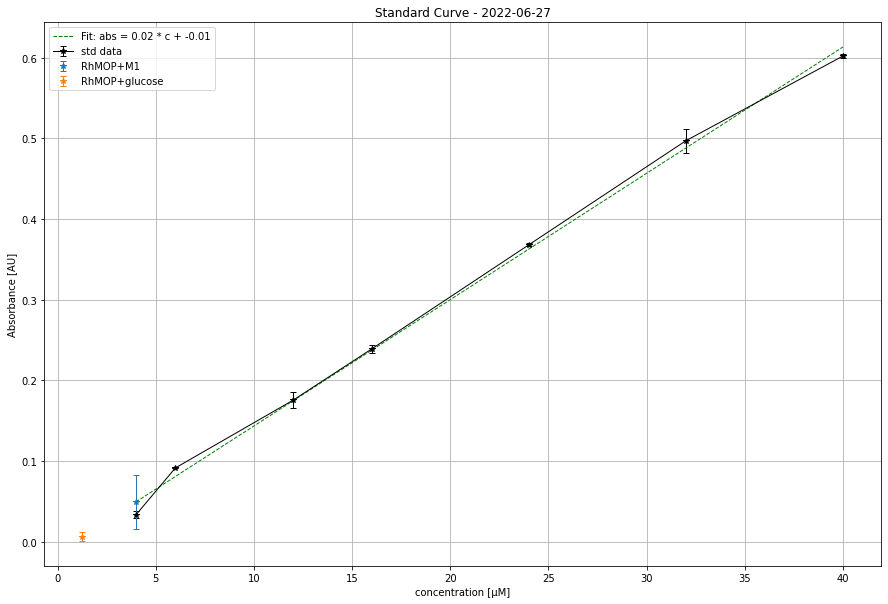

In [14]:
"""Standard data for RhMOP+M1 / Glucose"""
# raw data for std curve, absorbance values minus mean of blanks [AU]
#std_M1_abs = np.array([[1.708, 2.313, 1.056, 1.391, 1.262, 1.254, 1.087],
#                       [1.922, 1.823, 1.772, 1.493, 1.510, 1.479, 1.279]])-np.array([0.206,0.307]).mean()

std_M1_abs = np.array([[0.266,0.320,0.394,0.462,0.594,0.740,0.832], [0.257,0.319,0.413,0.472,0.598,0.710,0.828]])-np.array([0.228,0.228]).mean()

# initialize standard object with measured absorbances.          
std_M1 = Standard(
        absorbance=std_M1_abs,
        concentration=std_c,
        x_unit=x_unit,
        y_unit=y_unit,
    )

"""Sample data for RhMOP+M1"""
# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
RhMOP_M1_abs_0min  = np.array([[0.215],[0.206],[0.211]])-np.array([0.209, 0.216]).mean() # [AU]
RhMOP_M1_abs_10min = np.array([[0.306],[0.224],[0.233]])-np.array([0.203, 0.210]).mean() # [AU]

#initialize Enzyme objects
RhMOP_M1 = Enzyme(absorbance = RhMOP_M1_abs_10min - RhMOP_M1_abs_0min,
                Name= "RhMOP+M1",
                regr=std_M1.fit,
                time=incubation_time,
                dilution_factor=sample_dil,
                enzyme_stock_conc= RhMOP_stock_conc,
                x_unit = x_unit,
            )

"""Sample data for RhMOP + glucose"""
# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
RhMOP_gluc_abs_0min  = np.array([[0.208],[0.209],[0.216]])-np.array([0.208, 0.210]).mean() # [AU]
RhMOP_gluc_abs_10min = np.array([[0.214],[0.203],[0.210]])-np.array([0.200, 0.201]).mean() # [AU]

#initialize Enzyme objects
RhMOP_gluc = Enzyme(absorbance = RhMOP_gluc_abs_10min - RhMOP_gluc_abs_0min,
                Name= "RhMOP+glucose",
                regr=std_M1.fit,
                time=incubation_time,
                dilution_factor=sample_dil,
                enzyme_stock_conc= RhMOP_stock_conc,
                x_unit = x_unit,
            )

""" Unit conversions """

# Specific Activity in nkat/mg
RhMOP_M1.df["[nkat/mg]"] = RhMOP_M1.df["activity [nkat/ml]"] / RhMOP_stock_conc
RhMOP_M1.df["+/- [nkat/mg]"] = RhMOP_M1.df["+/- [nkat/ml]"] / RhMOP_stock_conc

RhMOP_gluc.df["[nkat/mg]"] = RhMOP_gluc.df["activity [nkat/ml]"] / RhMOP_stock_conc
RhMOP_gluc.df["+/- [nkat/mg]"] = RhMOP_gluc.df["+/- [nkat/ml]"] / RhMOP_stock_conc

# convert to kat/mol
RhMOP_mw = 42365.81 # [g/mol]

RhMOP_M1.df["[kat/mol]"] = RhMOP_M1.df["[nkat/mg]"] * 10 **-6 * RhMOP_mw
RhMOP_M1.df["+/- [kat/mol]"] = RhMOP_M1.df["+/- [nkat/mg]"] * 10 **-6 * RhMOP_mw

RhMOP_gluc.df["[kat/mol]"] = RhMOP_gluc.df["[nkat/mg]"] * 10 **-6 * RhMOP_mw
RhMOP_gluc.df["+/- [kat/mol]"] = RhMOP_gluc.df["+/- [nkat/mg]"] * 10 **-6 * RhMOP_mw

print(std_M1) # show data in "table"
print(RhMOP_M1.df.T) # show data in "table"
print(RhMOP_gluc.df.T) # show data in "table"

fig = plt.figure(figsize=[15,10])


std_M1.plot() 
RhMOP_M1.plot() 
RhMOP_gluc.plot()

# Plots

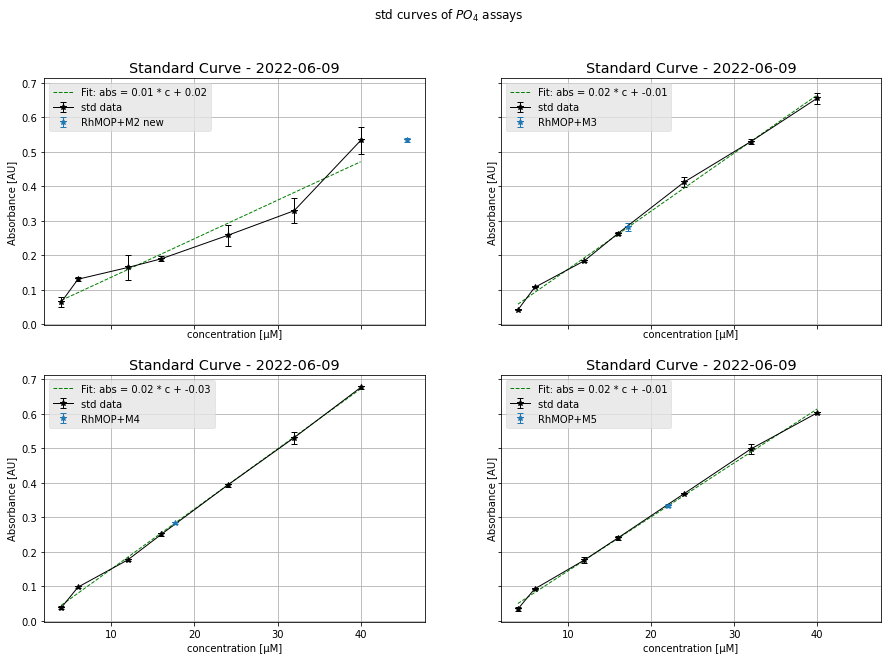

In [8]:
fig, ax = plt.subplots(nrows = 2,
                        ncols=2,
                        sharey = True,
                        sharex = True,
                        figsize = [15,10]
                    )
plt.style.use('ggplot')

fig.suptitle('std curves of $PO_4$ assays')

# Mannotriose (M2)
plt.sca(ax[0,0])
#std_M2.plot() 
#RhMOP_M2.plot() 
std_M2_1.plot() 
RhMOP_M2_1.plot() 

# Mannotriose (M3)
plt.sca(ax[0,1])
std_M3.plot() 
RhMOP_M3.plot() 

# Mannotetraose (M4)
plt.sca(ax[1,0])
std_M4.plot() 
RhMOP_M4.plot() 

# Mannotetraose (M5)
plt.sca(ax[1,1])
std_M5.plot() 
RhMOP_M5.plot() 

#std_M5_1.plot() 
#RhMOP_M5_1.plot() 

# render figure object
plt.show() 





In [ ]:
# Generate thoroughly made excel report
exp_list = [RhMOP_M2_1.df, RhMOP_M3.df, RhMOP_M4.df, RhMOP_M5.df]
std_list = [std_M2_1.df, std_M3.df, std_M4.df, std_M5.df]

# each row should have a line of text describing each math operation
notes = [
    "Absorbance of replicate # 1",
    "Absorbance of replicate # 2",
    "mean of absorbance replicates #1 and #2",
    "stdev of absorbance replicates #1 and #2",
    "Calculated concentration in [μM] using calibration curve",
    "Calculated concentration stdev in [μM] using calibration",
    "Multiplying the concentration by 10^3 gives the concentration expressed in [nM]",
    "Multiplying the concentration stdev by 10^3 gives the concentration stdev expressed in [nM]",
    "Dividing the concentration in [nM] by 10^3 gives the concentration expressed in [nmol/ml]",
    "Dividing the concentration stdev in [nM] by 10^3 gives the concentration stdev expressed in [nmol/ml]",
    "Dividing the concentration in [nmol/ml] by the incubation time (10min * 60 s/min = 600s) gives the activity/ml in nkat/ml for the assay volume.",
    "Dividing the concentration stdev in [nmol/ml] by the incubation time (10min * 60 s/min = 600s) gives the activity/ml stdev in nkat/ml for the assay volume.",
    "Multiplying the assay activity in nkat/ml  by the total dilution factor (60x * 20x * 6.25x = 7500x total dilution) gives the actiivty per volume enzyme stock added expressed in nkat/ml",
    "Multiplying the assay activity stdev in nkat/ml  by the total dilution factor (60x * 20x * 6.25x = 7500x total dilution) gives the activity per volume enzyme stock stdev added expressed in nkat/ml",
]


generate_excel_report(exp_list,std_list,path= "/Users/simon/Desktop/",filename = "RhMOP activity report",notes=notes)


In [9]:
# compile all experiments into dataframe

RhMOP_mw = 42365.81 # [g/mol]


#df = compile_experiments(exp_list, enzyme_mw = RhMOP_mw)


# print to terminal and export to excel sheet
#print(df)
#df.to_excel(f"/Users/simon/Desktop/output_{datetime.now().strftime('%y%m%d')}.xlsx")


## Conclusions
<p> 